In [1]:
import seaborn as sns

df = sns.load_dataset('taxis')
df


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


## 문제1 : Payment(cash, card)로 분류하여 x축은 가격, y축은 tip으로 scatter하고 의미가 있는지 분석하시오
## 결제 수단에 따른 요금 계산시 지불하는 팁의 크기를 확인하고 싶음
## 그 결과, 현재 현찰로 결제하는 손님이 매우 적음을 볼 수 있었고 카드로 결제하는 빈도와 이에 상응하는 팁의 지불 금액 또한 크고 넓게 분포 되어있음을 볼 수 있었습니다.
## 지불 비용이 적으면 팁도 적음


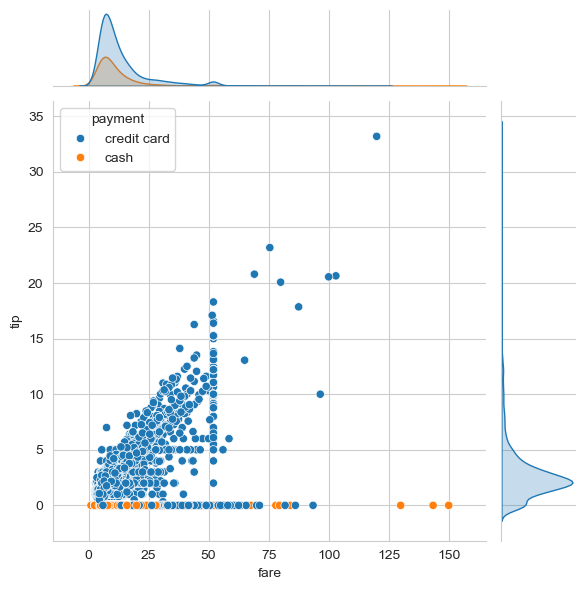

In [2]:
sns.jointplot(data = df, x ='fare', y = 'tip', hue = 'payment')

## 탑승 지역과 하차 지역의 수를 계산하고 싶음.
## 그 결과, 탑승과 하차지역 모두 맨하튼이 압도적으로 많았으며 그 다음으로는 퀸즈가 많았음을 공통적으로 보여주고 있었습니다.

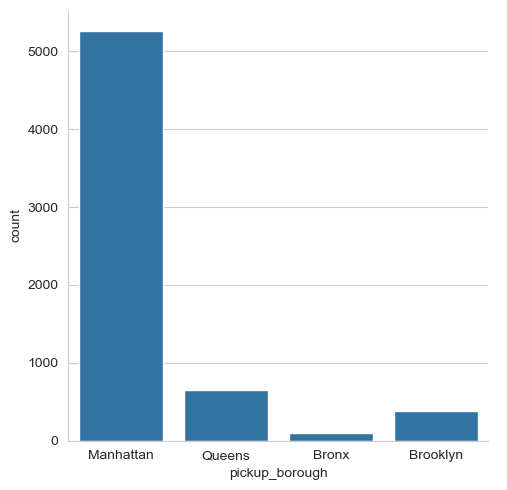

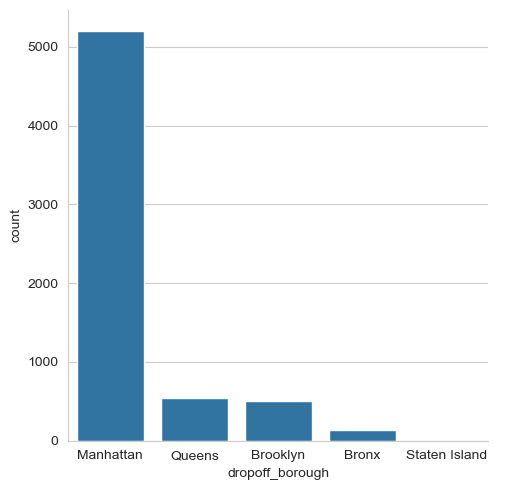

In [3]:
sns.catplot(data = df, x = 'pickup_borough', kind = 'count')
sns.catplot(data = df, x = 'dropoff_borough', kind = 'count')

## 탑승 승객수를 통해서 전체 요금의 분포를 확인하고자 함.
## 수행 결과 주로 승객 수가 2명이거나 3명인 경우가 순서대로 전체 요금에서 높은 분포를 보임.

/var/folders/cr/cw09092n13ndkzz47fhg5_100000gn/T/ipykernel_26621/319138683.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df, x = 'passengers', y = 'total', kind = 'violin',palette=['lightblue', 'lightpink'])
/var/folders/cr/cw09092n13ndkzz47fhg5_100000gn/T/ipykernel_26621/319138683.py:1: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(data = df, x = 'passengers', y = 'total', kind = 'violin',palette=['lightblue', 'lightpink'])


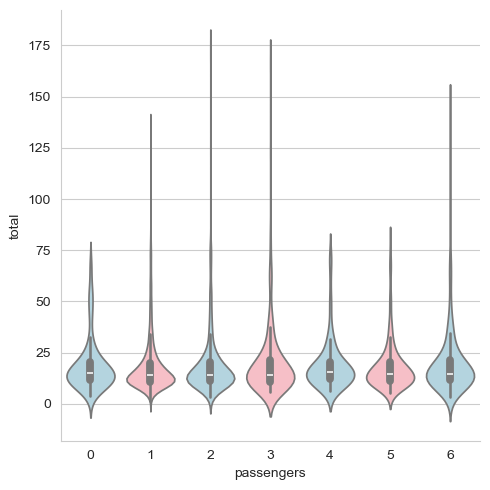

In [4]:
sns.catplot(data = df, x = 'passengers', y = 'total', kind = 'violin',palette=['lightblue', 'lightpink'])


 ## 앞서 맨하튼의 픽업과 드롭오프가 가장 많았음을 확인했었음
 ## 그렇기에 그럼 맨하튼에서 내리는 승객 즉, 맨하튼이 도착지인 승객들의 수의 분포를 확인하고 싶었습니다.
 ## 추가적으로 해당 분포를 확인할 때, color별로 나누어 yellow가 맨하튼으로 가는 수가 더 많았음을 볼 수 있었습니다.
 ## 이를 통해서 해당 지역으로 가는 택시의 수를 늘리는 제안을 할 수 있을 것 같습니다.

<Axes: xlabel='passengers', ylabel='Count'>

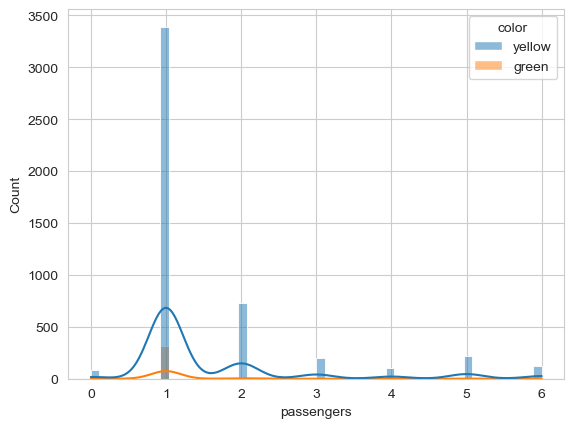

In [5]:
df_manhattan = df[df['dropoff_borough'] == 'Manhattan']

# 승객 수에 따른 히스토그램을 그리기
sns.histplot(data = df_manhattan, x = 'passengers', hue = 'color', kde=True)
